In [10]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# MIA ATTACK

In [11]:
mnist_quality_att_acc = np.array([0.3565, 0.3636, 0.3694, 0.3718, 0.3538, 0.3561, 0.51, 0.3527]).T
mnist_quality_shap = np.array([0.0025, -0.0013, -0.0009, -0.0025, 0.0023, 0.0016, 0.0019, 0.0025]).T
mnist_label_attack_acc = np.array([0.3153, 0.3145, 0.3143, 0.3200, 0.4169, 0.4736, 0.4040, 0.3938]).T
mnist_label_shap = np.array([0.0047, 0.0046, 0.0032, 0.0084, 0.0014, 0.0389, 0.0364, 0.03998]).T

fmnist_quality_att_acc = np.array([0.3903, 0.3967, 0.3871, 0.3862, 0.3932, 0.3856, 0.3974, 0.3958]).T
fmnist_quality_shap = np.array([0.0078, -0.0068, -0.0006, -0.0138, 0.0059, 0.0052, 0.0082, 0.0081]).T
fmnist_label_attack_acc = np.array([0.3153, 0.3145, 0.3143, 0.3138, 0.3145, 0.4167, 0.3213, 0.3982]).T
fmnist_label_shap = np.array([-0.0095, -0.0091, -0.010, -0.0115, -0.0106, 0.0217, 0.0218, 0.0220]).T

cifar_quality_att_acc = np.array([0.6956, 0.6955, 0.6956, 0.6956, 0.7300, 0.6956]).T
cifar_quality_shap = np.array([0.0141, 0.0124, -0.0005, -0.0307, 0.0088, 0.0112]).T
cifar_label_att_acc = np.array([0.7361, 0.7356, 0.7355, 0.7346, 0.7346, 0.7221]).T
cifar_label_shap = np.array([-0.0035, -0.0032, -0.0048, -0.0042, 0.0117, 0.0101]).T


In [12]:
df = pd.DataFrame([mnist_quality_att_acc, mnist_quality_shap, mnist_label_attack_acc, mnist_label_shap, fmnist_quality_att_acc,
                   fmnist_quality_shap, fmnist_label_attack_acc, fmnist_label_shap, cifar_quality_att_acc, cifar_quality_shap, cifar_label_att_acc, cifar_label_shap]).T
mapper = {0: 'mnist_quality_att_acc', 1: 'mnist_quality_shap', 2: 'mnist_label_attack_acc', 3: 'mnist_label_shap',
          4: 'fmnist_quality_att_acc', 5: 'fmnist_quality_shap', 6: 'fmnist_label_attack_acc', 7: 'fmnist_label_shap',
          8: 'cifar_quality_att_acc', 9: 'cifar_quality_shap', 10: 'cifar_label_att_acc', 11: 'cifar_label_shap'}
df = df.rename(mapper, axis=1)
df

,mnist_quality_att_acc,mnist_quality_shap,mnist_label_attack_acc,mnist_label_shap,fmnist_quality_att_acc,fmnist_quality_shap,fmnist_label_attack_acc,fmnist_label_shap,cifar_quality_att_acc,cifar_quality_shap,cifar_label_att_acc,cifar_label_shap
0,0.3565,0.0025,0.3153,0.00470,0.3903,0.0078,0.3153,-0.0095,0.6956,0.0141,0.7361,-0.0035
1,0.3636,-0.0013,0.3145,0.00460,0.3967,-0.0068,0.3145,-0.0091,0.6955,0.0124,0.7356,-0.0032
2,0.3694,-0.0009,0.3143,0.00320,0.3871,-0.0006,0.3143,-0.0100,0.6956,-0.0005,0.7355,-0.0048
3,0.3718,-0.0025,0.3200,0.00840,0.3862,-0.0138,0.3138,-0.0115,0.6956,-0.0307,0.7346,-0.0042
4,0.3538,0.0023,0.4169,0.00140,0.3932,0.0059,0.3145,-0.0106,0.7300,0.0088,0.7346,0.0117
5,0.3561,0.0016,0.4736,0.03890,0.3856,0.0052,0.4167,0.0217,0.6956,0.0112,0.7221,0.0101
6,0.5100,0.0019,0.4040,0.03640,0.3974,0.0082,0.3213,0.0218,NaN,NaN,NaN,NaN
7,0.3527,0.0025,0.3938,0.03998,0.3958,0.0081,0.3982,0.0220,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Shapley Value')

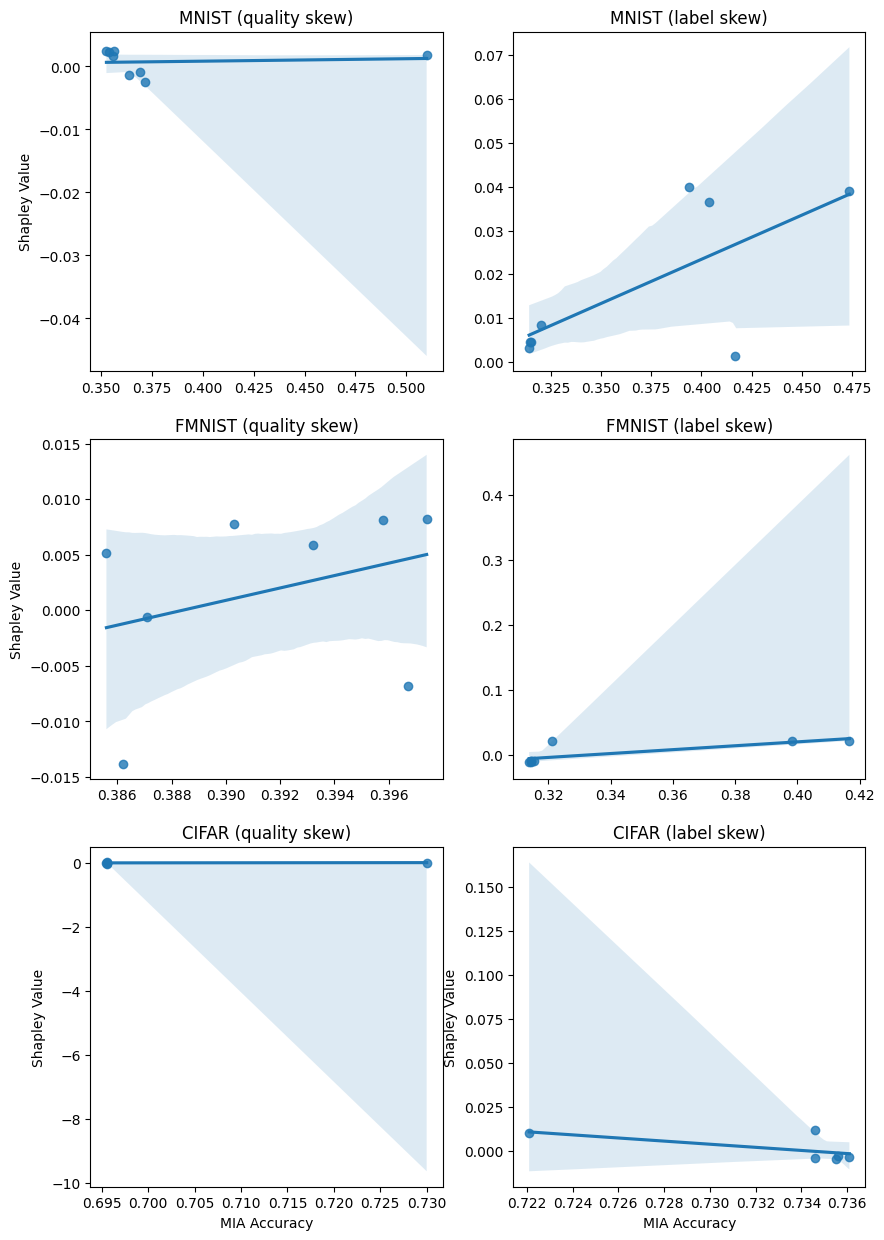

In [13]:
fig, ax = plt.subplots(3, 2, figsize=(10, 15))

sns.regplot(df, x='mnist_quality_att_acc', y='mnist_quality_shap', ax=ax[0][0])
ax[0][0].set_title("MNIST (quality skew)")
ax[0][0].set_ylabel('Shapley Value')
ax[0][0].set(xlabel=None)

sns.regplot(df, x='mnist_label_attack_acc', y='mnist_label_shap', ax=ax[0][1])
ax[0][1].set_title("MNIST (label skew)")
ax[0][1].set(xlabel=None, ylabel=None)

sns.regplot(df, x='fmnist_quality_att_acc', y='fmnist_quality_shap', ax=ax[1][0])
ax[1][0].set_title("FMNIST (quality skew)")
ax[1][0].set_ylabel('Shapley Value')
ax[1][0].set(xlabel=None)

sns.regplot(df, x='fmnist_label_attack_acc', y='fmnist_label_shap', ax=ax[1][1])
ax[1][1].set_title("FMNIST (label skew)")
ax[1][1].set(xlabel=None, ylabel=None)

sns.regplot(df, x='cifar_quality_att_acc', y='cifar_quality_shap', ax=ax[2][0])
ax[2][0].set_title("CIFAR (quality skew)")
ax[2][0].set_xlabel('MIA Accuracy')
ax[2][0].set_ylabel('Shapley Value')

sns.regplot(df, x='cifar_label_att_acc', y='cifar_label_shap', ax=ax[2][1])
ax[2][1].set_title("CIFAR (label skew)")
ax[2][1].set_xlabel('MIA Accuracy')
ax[2][1].set_ylabel('Shapley Value')

In [14]:
corr_table = pd.DataFrame(columns=['Pearson correlation coefficient', 'pcc p-value', 'spearman', 'spearman p-value'], 
                          index=['Mnist (quality split)', 'Mnist (label split)', 'Fashion Mnist (quality split)',
                                   'Fashion Mnist (label split)', 'Cifar10 (quality split)', 'Cifar10 (label split)'])

In [15]:
corr_table

,Pearson correlation coefficient,pcc p-value,spearman,spearman p-value
Mnist (quality split),NaN,NaN,NaN,NaN
Mnist (label split),NaN,NaN,NaN,NaN
Fashion Mnist (quality split),NaN,NaN,NaN,NaN
Fashion Mnist (label split),NaN,NaN,NaN,NaN
Cifar10 (quality split),NaN,NaN,NaN,NaN
Cifar10 (label split),NaN,NaN,NaN,NaN


In [16]:
corr_table.loc['Mnist (quality split)']['Pearson correlation coefficient'] = pearsonr(mnist_quality_att_acc, mnist_quality_shap)[0].round(decimals=4)
corr_table.loc['Mnist (quality split)']['pcc p-value'] = pearsonr(mnist_quality_att_acc, mnist_quality_shap)[1].round(decimals=4)

corr_table.loc['Mnist (label split)']['Pearson correlation coefficient'] = pearsonr(mnist_label_attack_acc, mnist_label_shap)[0].round(decimals=4)
corr_table.loc['Mnist (label split)']['pcc p-value'] = pearsonr(mnist_label_attack_acc, mnist_label_shap)[1].round(decimals=4)

corr_table.loc['Fashion Mnist (quality split)']['Pearson correlation coefficient'] = pearsonr(fmnist_quality_att_acc, fmnist_quality_shap)[0].round(decimals=4)
corr_table.loc['Fashion Mnist (quality split)']['pcc p-value'] = pearsonr(fmnist_quality_att_acc, fmnist_quality_shap)[1].round(decimals=4)

corr_table.loc['Fashion Mnist (label split)']['Pearson correlation coefficient'] = pearsonr(fmnist_label_attack_acc, fmnist_label_shap)[0].round(decimals=4)
corr_table.loc['Fashion Mnist (label split)']['pcc p-value'] = pearsonr(fmnist_label_attack_acc, fmnist_label_shap)[1].round(decimals=4)

corr_table.loc['Cifar10 (quality split)']['Pearson correlation coefficient'] = pearsonr(cifar_quality_att_acc, cifar_quality_shap)[0].round(decimals=4)
corr_table.loc['Cifar10 (quality split)']['pcc p-value'] = pearsonr(cifar_quality_att_acc, cifar_quality_shap)[1].round(decimals=4)

corr_table.loc['Cifar10 (label split)']['Pearson correlation coefficient'] = pearsonr(cifar_label_att_acc, cifar_label_shap)[0].round(decimals=4)
corr_table.loc['Cifar10 (label split)']['pcc p-value'] = pearsonr(cifar_label_att_acc, cifar_label_shap)[1].round(decimals=4)


/tmp/ipykernel_1803294/1077586360.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  corr_table.loc['Mnist (quality split)']['Pearson correlation coefficient'] = pearsonr(mnist_quality_att_acc, mnist_quality_shap)[0].round(decimals=4)
/tmp/

In [17]:
corr_table.loc['Mnist (quality split)']['spearman'] = spearmanr(mnist_quality_att_acc, mnist_quality_shap)[0].round(decimals=4)
corr_table.loc['Mnist (quality split)']['spearman p-value'] = spearmanr(mnist_quality_att_acc, mnist_quality_shap)[1].round(decimals=4)

corr_table.loc['Mnist (label split)']['spearman'] = spearmanr(mnist_label_attack_acc, mnist_label_shap)[0].round(decimals=4)
corr_table.loc['Mnist (label split)']['spearman p-value'] = spearmanr(mnist_label_attack_acc, mnist_label_shap)[1].round(decimals=4)

corr_table.loc['Fashion Mnist (quality split)']['spearman'] = spearmanr(fmnist_quality_att_acc, fmnist_quality_shap)[0].round(decimals=4)
corr_table.loc['Fashion Mnist (quality split)']['spearman p-value'] = spearmanr(fmnist_quality_att_acc, fmnist_quality_shap)[1].round(decimals=4)

corr_table.loc['Fashion Mnist (label split)']['spearman'] = spearmanr(fmnist_label_attack_acc, fmnist_label_shap)[0].round(decimals=4)
corr_table.loc['Fashion Mnist (label split)']['spearman p-value'] = spearmanr(fmnist_label_attack_acc, fmnist_label_shap)[1].round(decimals=4)

corr_table.loc['Cifar10 (quality split)']['spearman'] = spearmanr(cifar_quality_att_acc, cifar_quality_shap)[0].round(decimals=4)
corr_table.loc['Cifar10 (quality split)']['spearman p-value'] = spearmanr(cifar_quality_att_acc, cifar_quality_shap)[1].round(decimals=4)

corr_table.loc['Cifar10 (label split)']['spearman'] = spearmanr(cifar_label_att_acc, cifar_label_shap)[0].round(decimals=4)
corr_table.loc['Cifar10 (label split)']['spearman p-value'] = spearmanr(cifar_label_att_acc, cifar_label_shap)[1].round(decimals=4)


/tmp/ipykernel_1803294/3076530037.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  corr_table.loc['Mnist (quality split)']['spearman'] = spearmanr(mnist_quality_att_acc, mnist_quality_shap)[0].round(decimals=4)
/tmp/ipykernel_1803294/3076

In [18]:
corr_table

,Pearson correlation coefficient,pcc p-value,spearman,spearman p-value
Mnist (quality split),0.1037,0.8069,-0.6108,0.1077
Mnist (label split),0.6977,0.0544,0.4048,0.3199
Fashion Mnist (quality split),0.3331,0.4202,0.5238,0.1827
Fashion Mnist (label split),0.7754,0.0238,0.8503,0.0075
Cifar10 (quality split),0.1783,0.7354,-0.3381,0.5122
Cifar10 (label split),-0.6233,0.1861,-0.3769,0.4615


In [19]:
with open('corr_table.tex', 'w') as tf:
     tf.write(corr_table.to_latex())

# 2. Reconstruction Attack

In [20]:
mnist_quality_att_acc = np.array([0.8083, 0.7903, 0.8209, 0.8407, 0.8378, 0.8809, 0.8307, 0.8367]).T
mnist_quality_shap = np.array([0.0025, -0.0013, -0.0009, -0.0025, 0.0023, 0.0016, 0.0019, 0.0025]).T
mnist_label_attack_acc = np.array([0.9503, 0.9356, 0.8503, 0.9578, 0.9578, 0.9589, 0.9499, 0.9516]).T
mnist_label_shap = np.array([0.0047, 0.0046, 0.0032, 0.0084, 0.0014, 0.0389, 0.0364, 0.03998]).T

fmnist_quality_att_acc = np.array([0.5808, 0.5903, 0.5844, 0.6290, 0.5904, 0.5907, 0.5900, 0.5807]).T
fmnist_quality_shap = np.array([0.0078, -0.0068, -0.0006, -0.0138, 0.0059, 0.0052, 0.0082, 0.0081]).T
fmnist_label_attack_acc = np.array([0.6309, 0.5802, 0.5903, 0.5800, 0.6309, 0.5700, 0.6300, 0.6000]).T
fmnist_label_shap = np.array([-0.0095, -0.0091, -0.010, -0.0115, -0.0106, 0.0217, 0.0218, 0.0220]).T

cifar_quality_att_acc = np.array([0.4902, 0.3409, 0.3978, 0.4409, 0.0098, 0.5087]).T
cifar_quality_shap = np.array([0.0141, 0.0124, -0.0005, -0.0307, 0.0088, 0.0112]).T
cifar_label_att_acc = np.array([0.5067, 0.5010, 0.5710, 0.5209, 0.5609, 0.5374]).T
cifar_label_shap = np.array([-0.0035, -0.0032, -0.0048, -0.0042, 0.0117, 0.0101]).T

In [21]:
df = pd.DataFrame([mnist_quality_att_acc, mnist_quality_shap, mnist_label_attack_acc, mnist_label_shap, fmnist_quality_att_acc,
                   fmnist_quality_shap, fmnist_label_attack_acc, fmnist_label_shap, cifar_quality_att_acc, cifar_quality_shap, cifar_label_att_acc, cifar_label_shap]).T
mapper = {0: 'mnist_quality_att_acc', 1: 'mnist_quality_shap', 2: 'mnist_label_attack_acc', 3: 'mnist_label_shap',
          4: 'fmnist_quality_att_acc', 5: 'fmnist_quality_shap', 6: 'fmnist_label_attack_acc', 7: 'fmnist_label_shap',
          8: 'cifar_quality_att_acc', 9: 'cifar_quality_shap', 10: 'cifar_label_att_acc', 11: 'cifar_label_shap'}
df = df.rename(mapper, axis=1)
df

,mnist_quality_att_acc,mnist_quality_shap,mnist_label_attack_acc,mnist_label_shap,fmnist_quality_att_acc,fmnist_quality_shap,fmnist_label_attack_acc,fmnist_label_shap,cifar_quality_att_acc,cifar_quality_shap,cifar_label_att_acc,cifar_label_shap
0,0.8083,0.0025,0.9503,0.00470,0.5808,0.0078,0.6309,-0.0095,0.4902,0.0141,0.5067,-0.0035
1,0.7903,-0.0013,0.9356,0.00460,0.5903,-0.0068,0.5802,-0.0091,0.3409,0.0124,0.5010,-0.0032
2,0.8209,-0.0009,0.8503,0.00320,0.5844,-0.0006,0.5903,-0.0100,0.3978,-0.0005,0.5710,-0.0048
3,0.8407,-0.0025,0.9578,0.00840,0.6290,-0.0138,0.5800,-0.0115,0.4409,-0.0307,0.5209,-0.0042
4,0.8378,0.0023,0.9578,0.00140,0.5904,0.0059,0.6309,-0.0106,0.0098,0.0088,0.5609,0.0117
5,0.8809,0.0016,0.9589,0.03890,0.5907,0.0052,0.5700,0.0217,0.5087,0.0112,0.5374,0.0101
6,0.8307,0.0019,0.9499,0.03640,0.5900,0.0082,0.6300,0.0218,NaN,NaN,NaN,NaN
7,0.8367,0.0025,0.9516,0.03998,0.5807,0.0081,0.6000,0.0220,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Shapley Value')

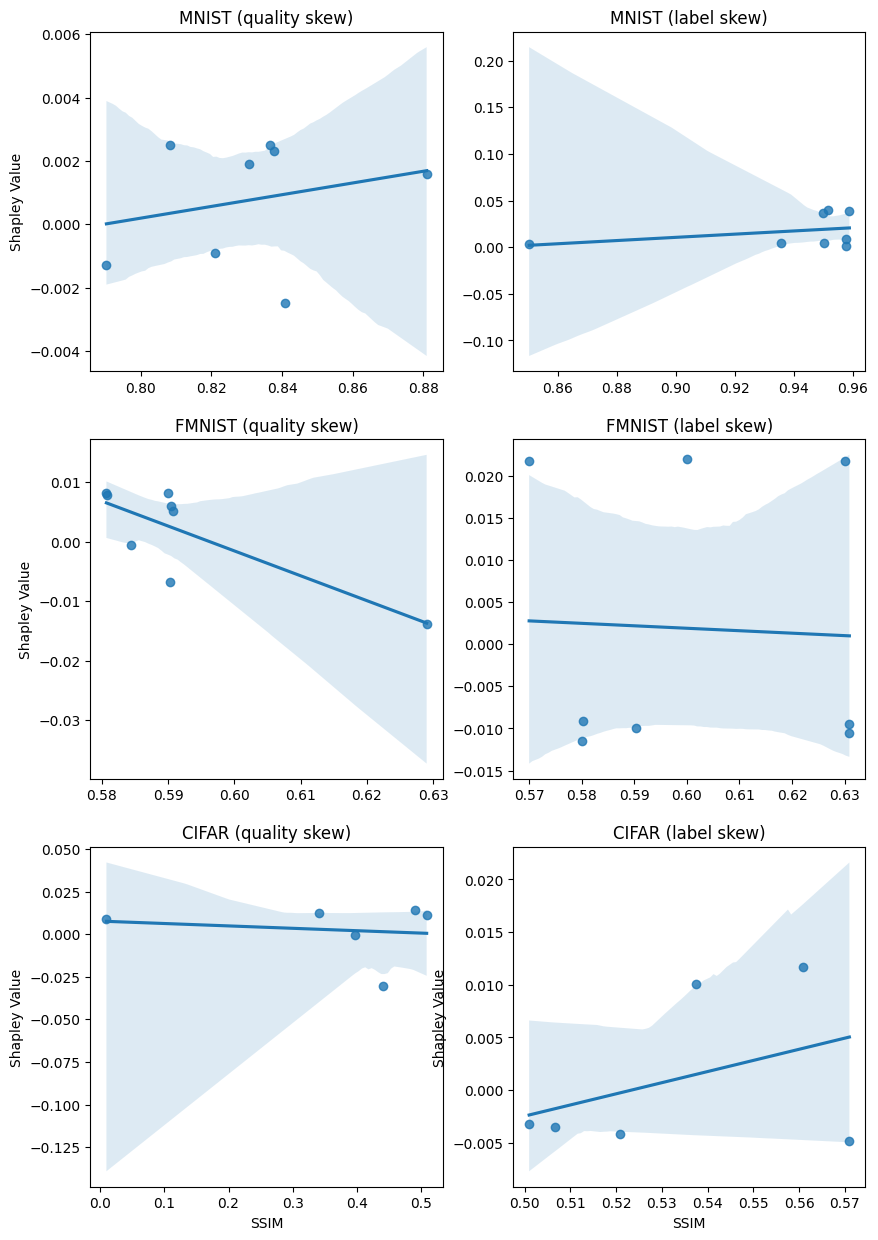

In [23]:
fig, ax = plt.subplots(3, 2, figsize=(10, 15))

sns.regplot(df, x='mnist_quality_att_acc', y='mnist_quality_shap', ax=ax[0][0])
ax[0][0].set_title("MNIST (quality skew)")
ax[0][0].set_ylabel('Shapley Value')
ax[0][0].set(xlabel=None)

sns.regplot(df, x='mnist_label_attack_acc', y='mnist_label_shap', ax=ax[0][1])
ax[0][1].set_title("MNIST (label skew)")
ax[0][1].set(xlabel=None, ylabel=None)

sns.regplot(df, x='fmnist_quality_att_acc', y='fmnist_quality_shap', ax=ax[1][0])
ax[1][0].set_title("FMNIST (quality skew)")
ax[1][0].set_ylabel('Shapley Value')
ax[1][0].set(xlabel=None)

sns.regplot(df, x='fmnist_label_attack_acc', y='fmnist_label_shap', ax=ax[1][1])
ax[1][1].set_title("FMNIST (label skew)")
ax[1][1].set(xlabel=None, ylabel=None)

sns.regplot(df, x='cifar_quality_att_acc', y='cifar_quality_shap', ax=ax[2][0])
ax[2][0].set_title("CIFAR (quality skew)")
ax[2][0].set_xlabel('SSIM')
ax[2][0].set_ylabel('Shapley Value')

sns.regplot(df, x='cifar_label_att_acc', y='cifar_label_shap', ax=ax[2][1])
ax[2][1].set_title("CIFAR (label skew)")
ax[2][1].set_xlabel('SSIM')
ax[2][1].set_ylabel('Shapley Value')

In [25]:
corr_table = pd.DataFrame(columns=['Pearson correlation coefficient', 'pcc p-value', 'spearman', 'spearman p-value'], 
                          index=['Mnist (quality split)', 'Mnist (label split)', 'Fashion Mnist (quality split)',
                                   'Fashion Mnist (label split)', 'Cifar10 (quality split)', 'Cifar10 (label split)'])

In [26]:
corr_table.loc['Mnist (quality split)']['Pearson correlation coefficient'] = pearsonr(mnist_quality_att_acc, mnist_quality_shap)[0].round(decimals=4)
corr_table.loc['Mnist (quality split)']['pcc p-value'] = pearsonr(mnist_quality_att_acc, mnist_quality_shap)[1].round(decimals=4)

corr_table.loc['Mnist (label split)']['Pearson correlation coefficient'] = pearsonr(mnist_label_attack_acc, mnist_label_shap)[0].round(decimals=4)
corr_table.loc['Mnist (label split)']['pcc p-value'] = pearsonr(mnist_label_attack_acc, mnist_label_shap)[1].round(decimals=4)

corr_table.loc['Fashion Mnist (quality split)']['Pearson correlation coefficient'] = pearsonr(fmnist_quality_att_acc, fmnist_quality_shap)[0].round(decimals=4)
corr_table.loc['Fashion Mnist (quality split)']['pcc p-value'] = pearsonr(fmnist_quality_att_acc, fmnist_quality_shap)[1].round(decimals=4)

corr_table.loc['Fashion Mnist (label split)']['Pearson correlation coefficient'] = pearsonr(fmnist_label_attack_acc, fmnist_label_shap)[0].round(decimals=4)
corr_table.loc['Fashion Mnist (label split)']['pcc p-value'] = pearsonr(fmnist_label_attack_acc, fmnist_label_shap)[1].round(decimals=4)

corr_table.loc['Cifar10 (quality split)']['Pearson correlation coefficient'] = pearsonr(cifar_quality_att_acc, cifar_quality_shap)[0].round(decimals=4)
corr_table.loc['Cifar10 (quality split)']['pcc p-value'] = pearsonr(cifar_quality_att_acc, cifar_quality_shap)[1].round(decimals=4)

corr_table.loc['Cifar10 (label split)']['Pearson correlation coefficient'] = pearsonr(cifar_label_att_acc, cifar_label_shap)[0].round(decimals=4)
corr_table.loc['Cifar10 (label split)']['pcc p-value'] = pearsonr(cifar_label_att_acc, cifar_label_shap)[1].round(decimals=4)


/tmp/ipykernel_1803294/1077586360.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  corr_table.loc['Mnist (quality split)']['Pearson correlation coefficient'] = pearsonr(mnist_quality_att_acc, mnist_quality_shap)[0].round(decimals=4)
/tmp/

In [27]:
corr_table.loc['Mnist (quality split)']['spearman'] = spearmanr(mnist_quality_att_acc, mnist_quality_shap)[0].round(decimals=4)
corr_table.loc['Mnist (quality split)']['spearman p-value'] = spearmanr(mnist_quality_att_acc, mnist_quality_shap)[1].round(decimals=4)

corr_table.loc['Mnist (label split)']['spearman'] = spearmanr(mnist_label_attack_acc, mnist_label_shap)[0].round(decimals=4)
corr_table.loc['Mnist (label split)']['spearman p-value'] = spearmanr(mnist_label_attack_acc, mnist_label_shap)[1].round(decimals=4)

corr_table.loc['Fashion Mnist (quality split)']['spearman'] = spearmanr(fmnist_quality_att_acc, fmnist_quality_shap)[0].round(decimals=4)
corr_table.loc['Fashion Mnist (quality split)']['spearman p-value'] = spearmanr(fmnist_quality_att_acc, fmnist_quality_shap)[1].round(decimals=4)

corr_table.loc['Fashion Mnist (label split)']['spearman'] = spearmanr(fmnist_label_attack_acc, fmnist_label_shap)[0].round(decimals=4)
corr_table.loc['Fashion Mnist (label split)']['spearman p-value'] = spearmanr(fmnist_label_attack_acc, fmnist_label_shap)[1].round(decimals=4)

corr_table.loc['Cifar10 (quality split)']['spearman'] = spearmanr(cifar_quality_att_acc, cifar_quality_shap)[0].round(decimals=4)
corr_table.loc['Cifar10 (quality split)']['spearman p-value'] = spearmanr(cifar_quality_att_acc, cifar_quality_shap)[1].round(decimals=4)

corr_table.loc['Cifar10 (label split)']['spearman'] = spearmanr(cifar_label_att_acc, cifar_label_shap)[0].round(decimals=4)
corr_table.loc['Cifar10 (label split)']['spearman p-value'] = spearmanr(cifar_label_att_acc, cifar_label_shap)[1].round(decimals=4)


/tmp/ipykernel_1803294/3076530037.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  corr_table.loc['Mnist (quality split)']['spearman'] = spearmanr(mnist_quality_att_acc, mnist_quality_shap)[0].round(decimals=4)
/tmp/ipykernel_1803294/3076

In [28]:
corr_table

,Pearson correlation coefficient,pcc p-value,spearman,spearman p-value
Mnist (quality split),0.2457,0.5575,-0.0838,0.8435
Mnist (label split),0.3543,0.3891,0.3593,0.3821
Fashion Mnist (quality split),-0.7941,0.0186,-0.619,0.1017
Fashion Mnist (label split),-0.0451,0.9156,0.0,1.0
Cifar10 (quality split),-0.1519,0.7739,0.2,0.704
Cifar10 (label split),0.3937,0.4399,-0.0857,0.8717


In [29]:
with open('corr_table_reconstruction.tex', 'w') as tf:
     tf.write(corr_table.to_latex())